<a href="https://colab.research.google.com/github/RodrigoDSVDF/Projeto1/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_ProjetodeMarchineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as srn
import statistics  as sts
import matplotlib.pyplot as plt

In [2]:
credito = pd.read_csv("/content/Credit.csv")

In [3]:
credito.shape

(1000, 21)

In [4]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [6]:
# Supondo que 'credito' seja o seu DataFrame e 'coluna_desejada' seja o nome da coluna
print(credito['personal_status'].head())


0           'male single'
1    'female div/dep/mar'
2           'male single'
3           'male single'
4           'male single'
Name: personal_status, dtype: object


In [7]:
# condição lógica para ajudar a entender a distribuição dos dados

condicao = (
   (credito['duration'] > 36 ) &  # Duração do empréstimo maior "que " em meses
    credito['num_dependents'].notna() &  # Verifica se 'num_dependents' não é nulo
    credito['class'].isin([ 'bad'])  # Bom ou mau pagador
)

resultados = credito[condicao]

if not resultados.empty:
    print("Resultados encontrados:")
    print(resultados)
else:
    print("Nenhum resultado encontrado com as condições especificadas.")




Resultados encontrados:
    checking_status  duration                    credit_history  \
1          0<=X<200        48                   'existing paid'   
11               <0        48                   'existing paid'   
29               <0        60              'delayed previously'   
35         0<=X<200        45  'critical/other existing credit'   
44               <0        48  'critical/other existing credit'   
63         0<=X<200        48             'no credits/all paid'   
76               <0        42                   'existing paid'   
95         0<=X<200        54             'no credits/all paid'   
116              <0        42                   'existing paid'   
191        0<=X<200        48             'no credits/all paid'   
194        0<=X<200        45                   'existing paid'   
226        0<=X<200        48                   'existing paid'   
242              <0        48             'no credits/all paid'   
273        0<=X<200        48         

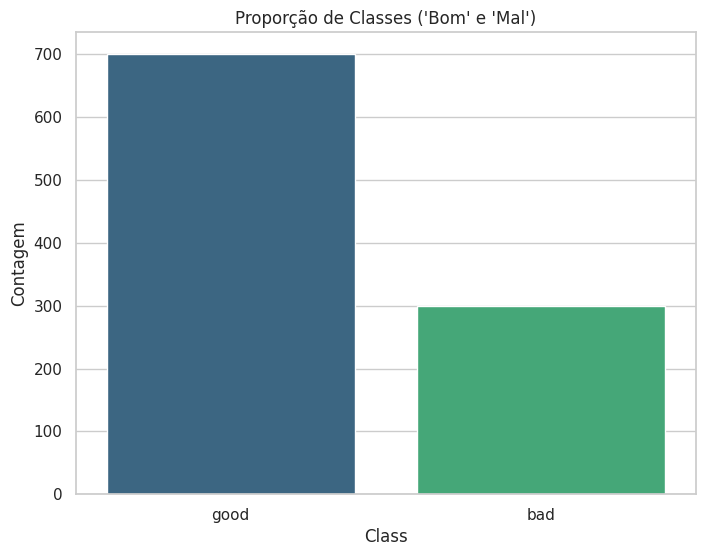

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'credito' seja o seu DataFrame
sns.set(style="whitegrid")  # Define o estilo do gráfico

# Conta a quantidade de cada valor na coluna 'classe'
contagem_classe = credito['class'].value_counts()

# Cria o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_classe.index, y=contagem_classe.values, palette="viridis")

# Adiciona rótulos e título
plt.xlabel("Class")
plt.ylabel("Contagem")
plt.title("Proporção de Classes ('Bom' e 'Mal')")

# Exibe o gráfico
plt.show()


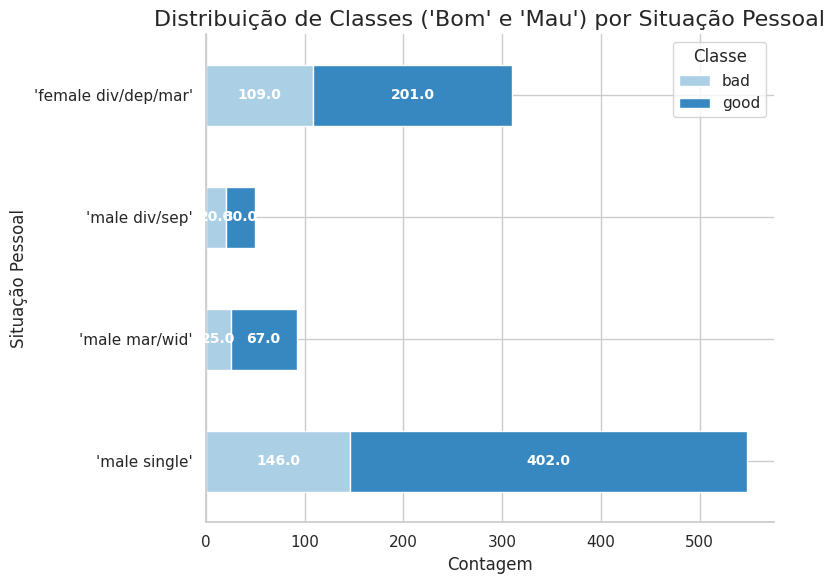

In [10]:
# Supondo que 'credito' seja o seu DataFrame
sns.set(style="whitegrid")  # Define o estilo do gráfico

# Cria um DataFrame com a contagem de 'classe' agrupado por 'sexo'
contagem_sexo_classe = credito.groupby(['personal_status', 'class']).size().unstack()

# Define uma paleta de cores suaves em tons de azul
cores = sns.color_palette("Blues", n_colors=len(contagem_sexo_classe.columns))

# Cria o gráfico de barras empilhadas horizontal com tamanho reduzido
fig, ax = plt.subplots(figsize=(8, 6))
contagem_sexo_classe.plot(kind='barh', stacked=True, color=cores, ax=ax)

# Adiciona rótulos e título
plt.xlabel("Contagem")
plt.ylabel("Situação Pessoal")
plt.title("Distribuição de Classes ('Bom' e 'Mau') por Situação Pessoal", fontsize=16)

# Adiciona legenda com título
plt.legend(title="Classe", loc="upper right")

# Inverte a ordem dos y-ticks para tornar a visualização mais clara
plt.gca().invert_yaxis()

# Adiciona anotações para cada barra
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width}',
                (x + width/2, y + height/2),
                ha='center',
                va='center',
                fontsize=10,
                color='white',  # Cor do texto
                weight='bold'   # Estilo do texto
               )

# Remove bordas desnecessárias
sns.despine()

# Ajusta o layout para evitar cortes
plt.tight_layout()

# Exibe o gráfico
plt.show()


In [11]:

contagem_sexos = credito['personal_status'].value_counts()

print(contagem_sexos)

'male single'           548
'female div/dep/mar'    310
'male mar/wid'           92
'male div/sep'           50
Name: personal_status, dtype: int64


In [12]:
import numpy as np

# Lista de substrings que indicam gênero masculino
substrings_masculinas = ['male mar/wid', 'male single', 'male div/sep']

# Substitui os valores na coluna 'personal_status' com base nas substrings
credito['personal_status'] = np.where(credito['personal_status'].str.contains('|'.join(substrings_masculinas), case=False), 'male', 'female')

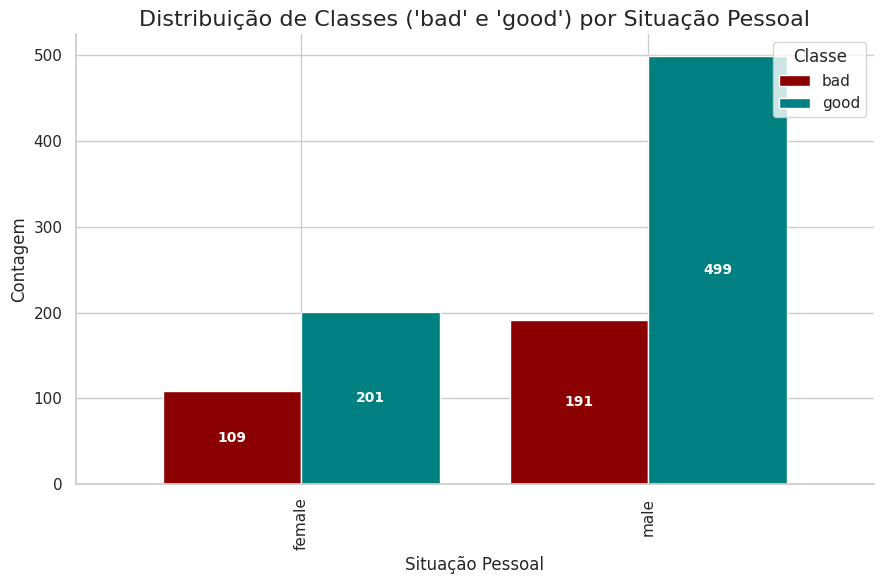

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração de estilo do Seaborn
sns.set(style="whitegrid", palette="viridis")  # Define o estilo do gráfico e a paleta de cores

# Cria um DataFrame com a contagem de 'classe' agrupado por 'sexo'
contagem_sexo_classe = credito.groupby(['personal_status', 'class']).size().unstack()

# Define paletas de cores para "Bad" (vermelho) e "Good" (azul)
cores = {'bad': 'darkred', 'good': 'teal'}

# Cria o gráfico de barras agrupado com cores diferentes para cada classe
ax = contagem_sexo_classe.plot(kind='bar', figsize=(9, 6), width=0.8, color=[cores[col] for col in contagem_sexo_classe.columns])

# Adiciona rótulos e título
plt.xlabel("Situação Pessoal")
plt.ylabel("Contagem")
plt.title("Distribuição de Classes ('bad' e 'good') por Situação Pessoal", fontsize=16)

# Adiciona legenda com título
plt.legend(title="Classe", loc="upper right")

# Adiciona anotações para cada barra
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}',
                (x + width/2, y + height/2),
                ha='center',
                va='center',
                fontsize=10,
                color='white' if height > 0.1 else 'black',  # Escolhe a cor do texto com base na altura da barra
                weight='bold'   # Estilo do texto
               )

# Remove bordas desnecessárias
sns.despine()

# Ajusta o layout para evitar cortes
plt.tight_layout()

# Exibe o gráfico
plt.show()


In [14]:
# Supondo que 'credito' seja o seu DataFrame
contagem_sexos = credito['personal_status'].value_counts()

print(contagem_sexos)

male      690
female    310
Name: personal_status, dtype: int64


In [15]:
# aqui utilizamos a função goupby para uma análise um pouco diferente
agrupado = credito.groupby(['personal_status']).size()
agrupado

personal_status
female    310
male      690
dtype: int64

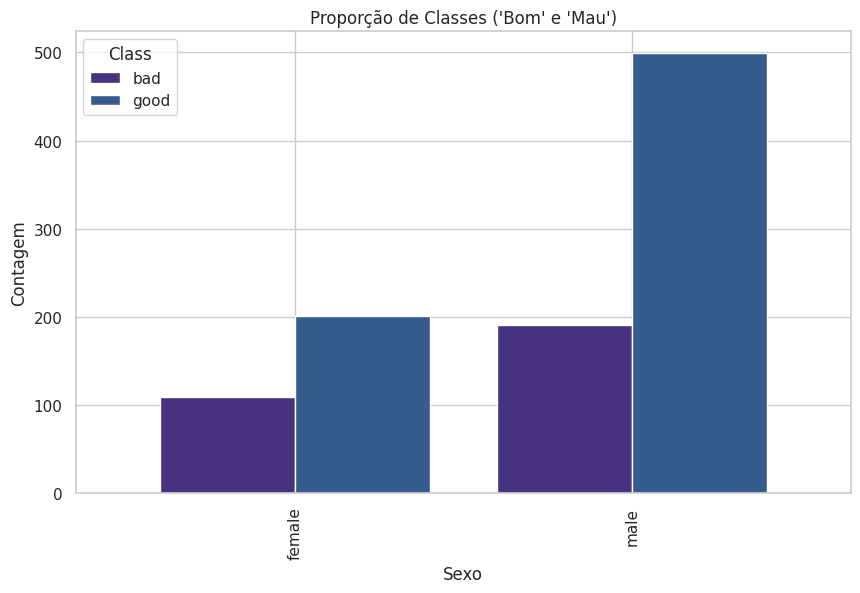

In [16]:
# Configuração de estilo do Seaborn
sns.set(style="whitegrid", palette="viridis")  # Define o estilo do gráfico e a paleta de cores

# Cria um DataFrame com a contagem de 'classe' agrupado por 'sexo'
contagem_sexo_classe = credito.groupby(['personal_status', 'class']).size().unstack()

# Cria o gráfico de barras agrupado
contagem_sexo_classe.plot(kind='bar', figsize=(10, 6), width=0.8)

# Adiciona rótulos e título
plt.xlabel("Sexo")
plt.ylabel("Contagem")
plt.title("Proporção de Classes ('Bom' e 'Mau')")

# Adiciona legenda
plt.legend(title="Class")

# Exibe o gráfico
plt.show()

<Axes: xlabel='personal_status'>

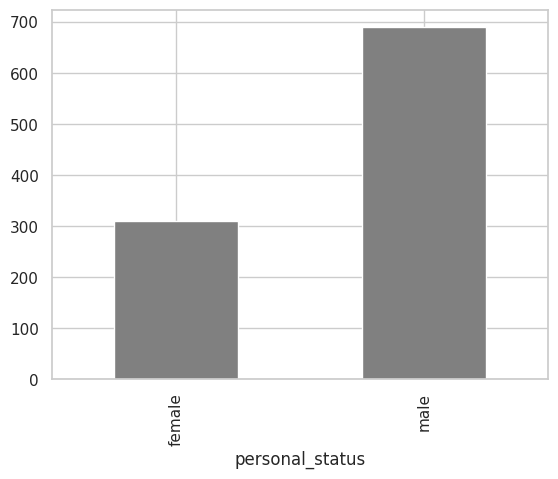

In [17]:
agrupado.plot.bar(color = 'gray')

In [18]:

# analisando valores estátiscos para entender o os dados
credito['age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

<ipython-input-68-b339140209de>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'age')

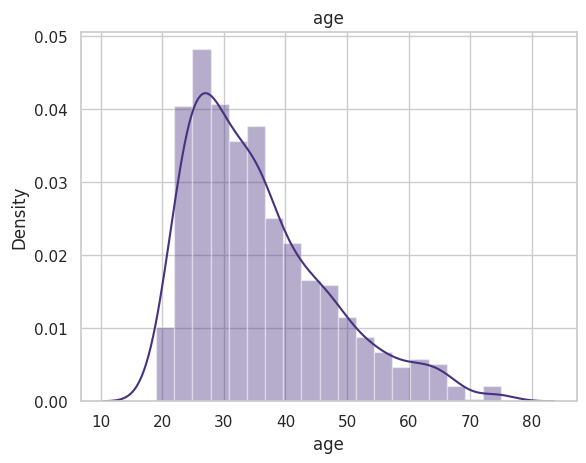

In [68]:
# Visualização da distribuição das idades
sns.distplot(credito['age']).set_title('age')

In [19]:
agrupado = credito.groupby(['age']).size()
agrupado

age
19     2
20    14
21    14
22    27
23    48
24    44
25    41
26    50
27    51
28    43
29    37
30    40
31    38
32    34
33    33
34    32
35    40
36    39
37    29
38    24
39    21
40    25
41    17
42    22
43    17
44    17
45    15
46    18
47    17
48    12
49    14
50    12
51     8
52     9
53     7
54    10
55     8
56     3
57     9
58     5
59     3
60     6
61     7
62     2
63     8
64     5
65     5
66     5
67     3
68     3
70     1
74     4
75     2
dtype: int64

In [20]:
#verificando se há valores nulos
credito.isnull().sum()



checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [21]:
# Analisando o mantante

agrupado = credito.groupby(['credit_amount']).size()
agrupado

credit_amount
250      1
276      1
338      1
339      1
343      1
        ..
15653    1
15672    1
15857    1
15945    1
18424    1
Length: 921, dtype: int64

In [22]:
agrupado = credito.groupby(['credit_amount']).size().sort_values(ascending=False)


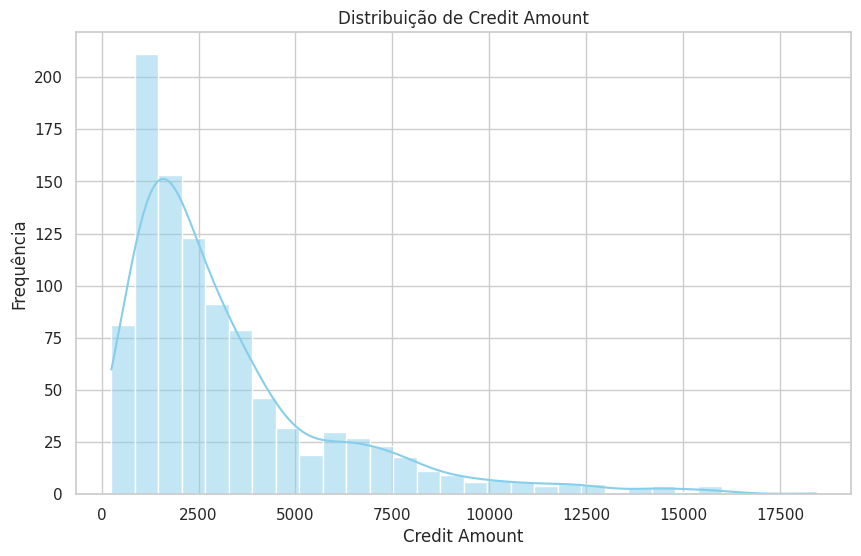

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(credito['credit_amount'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição de Credit Amount')
plt.xlabel('Credit Amount')
plt.ylabel('Frequência')
plt.show()

In [24]:
import plotly.express as px
import pandas as pd

# Supondo que 'dados' seja o seu DataFrame
# Substitua 'coluna1', 'coluna2', 'coluna3' e 'coluna4' pelos nomes reais das suas variáveis
fig = px.scatter_matrix(credito[['residence_since', 'credit_amount', 'existing_credits']])

# Atualiza o layout do gráfico com um tamanho menor
fig.update_layout(
    title="Gráfico de Dispersão para 4 Variáveis",
    height=500, width=500
)

# Exibe o gráfico
fig.show()


In [25]:
x = credito.duration
y = credito.credit_amount

In [26]:
# Retorna os valores únicos do atributo "treatment"
unicos = list(set(credito.credit_history))
unicos

["'existing paid'",
 "'critical/other existing credit'",
 "'delayed previously'",
 "'all paid'",
 "'no credits/all paid'"]

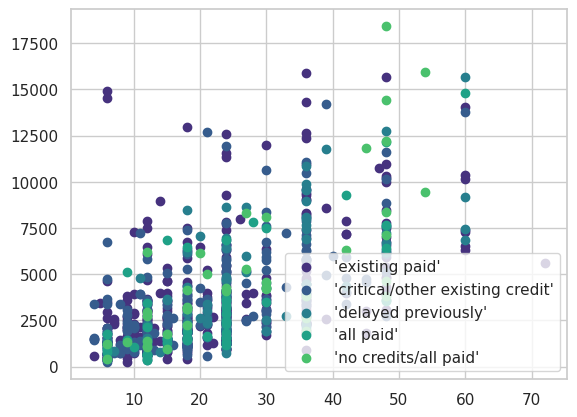

In [27]:
# Percorre cada tipo de tratamento (chilled e nonchilled) e cria um gráfico de dispersão
for i in range(len(unicos)):
    indice = credito.	credit_history == unicos[i]
    plt.scatter(x[indice], y[indice], label = unicos[i])
plt.legend(loc = 'lower right')

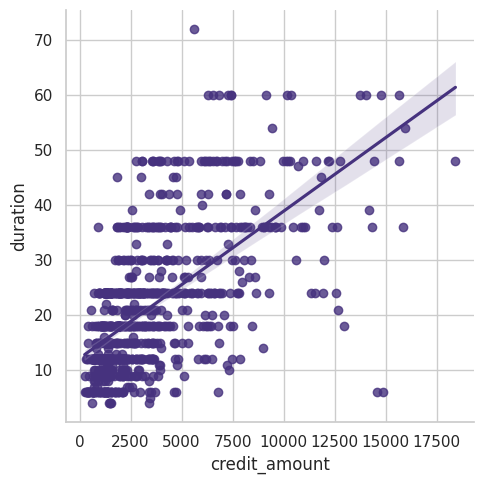

In [28]:
# correlação entre o montante e a duração do crédito


sns.lmplot(x = "credit_amount", y = "duration", data = credito);

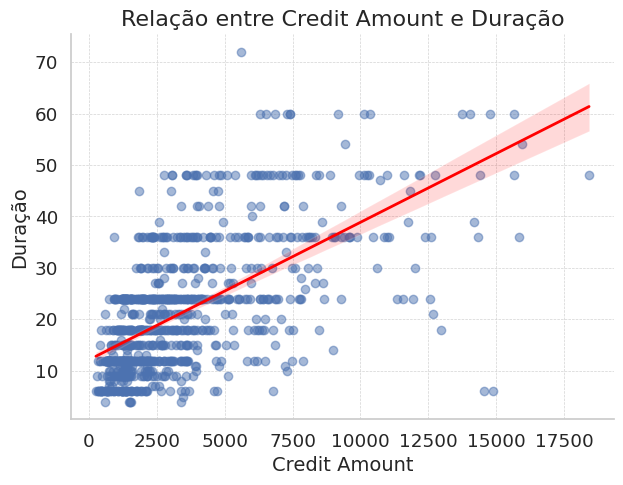

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração de estilo do Seaborn
sns.set(style="whitegrid", font_scale=1.2)

# Criando uma figura
plt.figure(figsize=(7, 5))

# Gráfico de dispersão com linha de regressão
sns.regplot(x="credit_amount", y="duration", data=credito, scatter_kws={'alpha':0.5}, line_kws={'color': 'red', 'linewidth': 2})

# Adicionando títulos e rótulos
plt.title('Relação entre Credit Amount e Duração', fontsize=16)
plt.xlabel('Credit Amount', fontsize=14)
plt.ylabel('Duração', fontsize=14)

# Adicionando grade de fundo
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Ajustando a aparência da grade
sns.despine()

# Exibindo o gráfico
plt.show()


<ipython-input-30-e8e3075211af>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



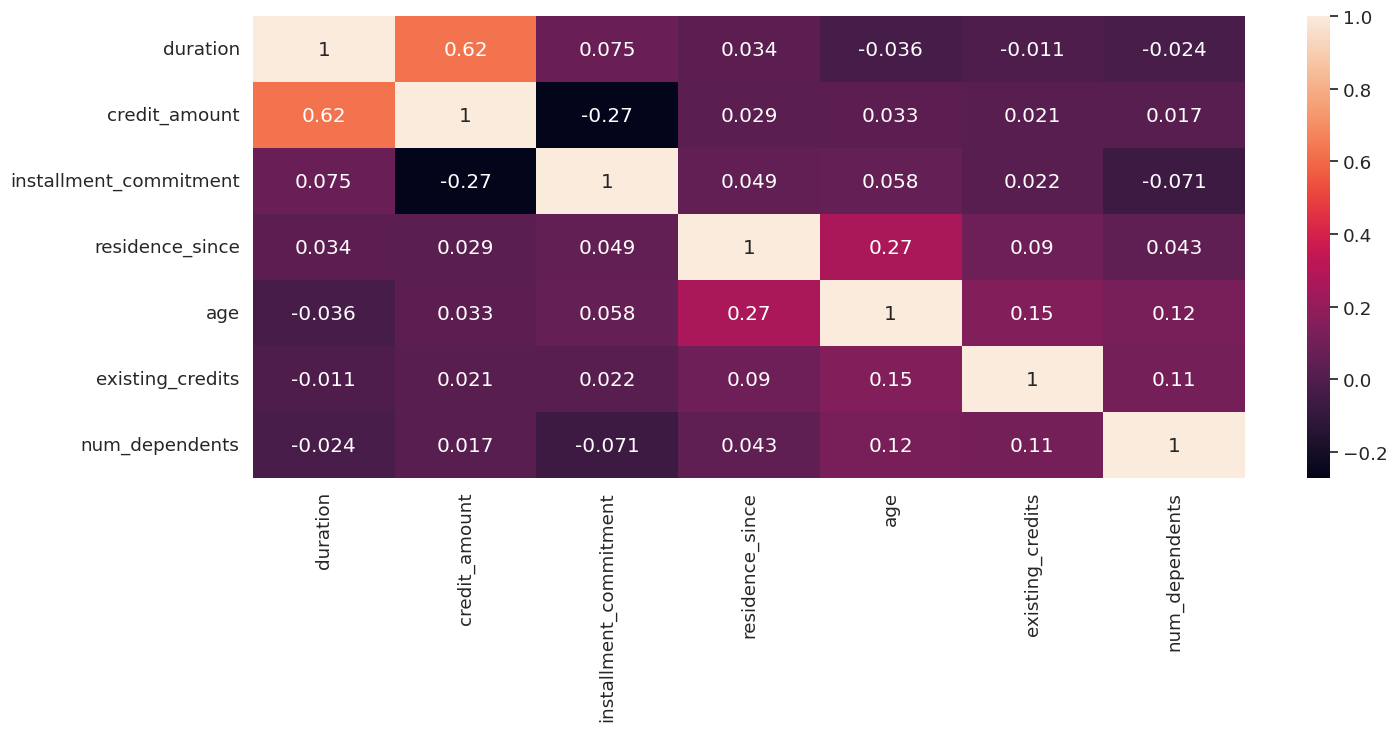

In [30]:
plt.rcParams["figure.figsize"] = (16,6)
ax = sns.heatmap(credito.corr(), annot=True)

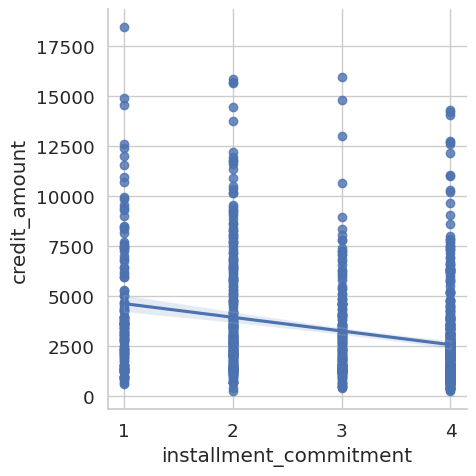

In [31]:
sns.lmplot(x = "installment_commitment", y = "credit_amount", data = credito);

In [35]:
contagem_valores = credito['own_telephone'].value_counts()

In [36]:
print(contagem_valores)

none    596
yes     404
Name: own_telephone, dtype: int64


In [87]:
pip install seaborn


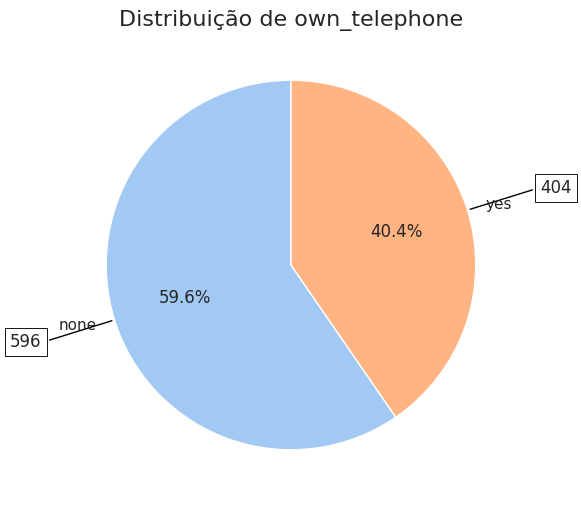

In [37]:


# Substitua 'credito' pelo nome real do seu DataFrame
own_telephone_counts = credito['own_telephone'].value_counts()

# Configurações do estilo do Seaborn
sns.set(style="whitegrid")
colors = sns.color_palette("pastel")[0:2]

# Cria o gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(own_telephone_counts, labels=own_telephone_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)

# Adiciona título
plt.title('Distribuição de own_telephone', fontsize=16)

# Adiciona informações numéricas ao lado das porcentagens
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center", fontsize=12)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle, "color": "black"})
    ax.annotate(f'{own_telephone_counts[i]}', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

# Exibe o gráfico
plt.show()


In [38]:
# Índices presentes nos dados fornecidos
indices_presentes = credito.index

# Índices completos
todos_os_indices = range(1000)  # Assumindo que o conjunto original tem 1000 entradas

# Índices ausentes
indices_ausentes = [idx for idx in todos_os_indices if idx not in indices_presentes]

# Dados completos
dados_completos = credito.loc[indices_ausentes]





<ipython-input-39-64376e374c7a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




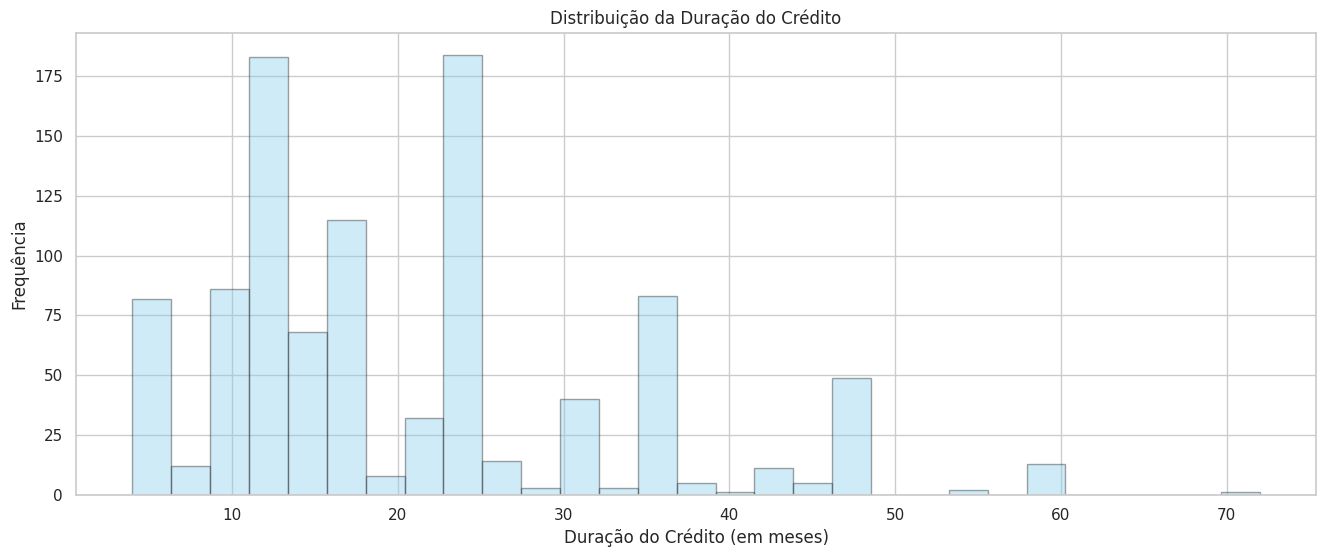

In [39]:
sns.set(style="whitegrid")  # Definindo o estilo do gráfico

# Plotando o gráfico e configurando as propriedades
sns.distplot(credito['duration'], color='skyblue', kde=False, hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribuição da Duração do Crédito')
plt.xlabel('Duração do Crédito (em meses)')
plt.ylabel('Frequência')
plt.show()







In [40]:
credito['credit_amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64

<ipython-input-94-52a1c52226bb>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




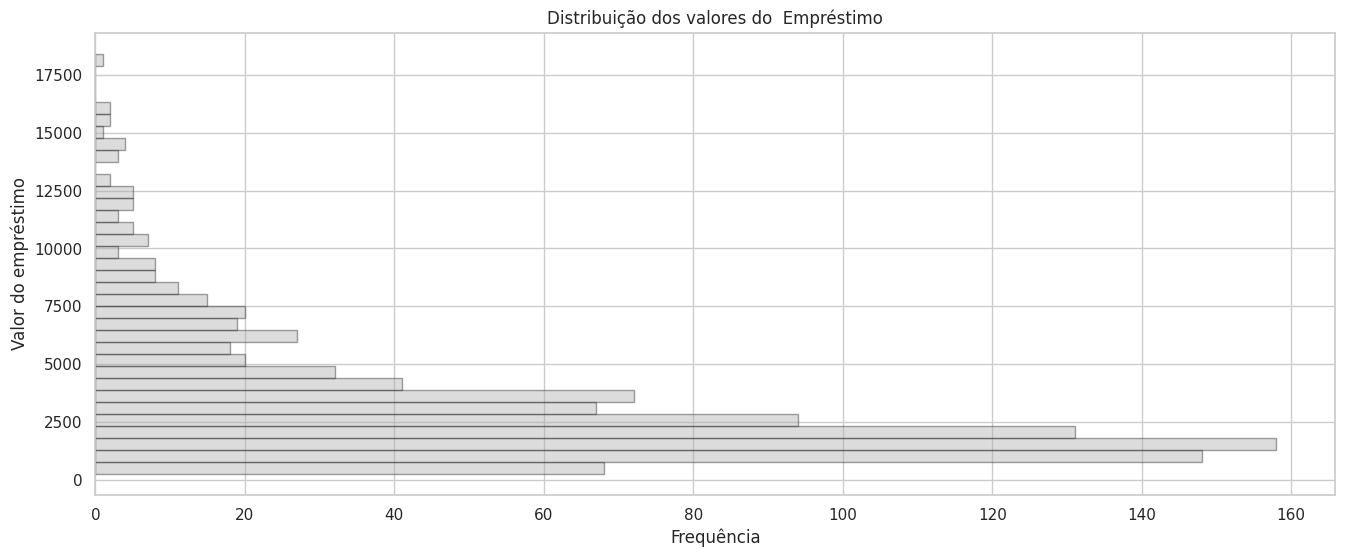

In [94]:
 # Definindo o estilo do gráfico
sns.set(style="whitegrid")

# Plotando o gráfico de forma horizontal com uma cor cinza escura
sns.distplot(credito['credit_amount'], color='darkgray', kde=False, vertical=True, hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribuição dos valores do  Empréstimo')
plt.xlabel('Frequência')
plt.ylabel('Valor do empréstimo')
plt.show()


In [41]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# Supondo que 'credito' seja o seu DataFrame
credit_amount = credito['credit_amount']

# Calculando medidas estatísticas
mean = np.mean(credit_amount)
median = np.median(credit_amount)
std_dev = np.std(credit_amount)
skewness = stats.skew(credit_amount)
kurt = stats.kurtosis(credit_amount)

# Criando um DataFrame para apresentar as estatísticas
estatisticas_df = pd.DataFrame({
    'Média': [mean],
    'Mediana': [median],
    'Desvio Padrão': [std_dev],
    'Assimetria': [skewness],
    'Curtose': [kurt]
})

# Apresentando as estatísticas
print(estatisticas_df)


      Média  Mediana  Desvio Padrão  Assimetria   Curtose
0  3271.258   2319.5    2821.325155    1.946702  4.265163


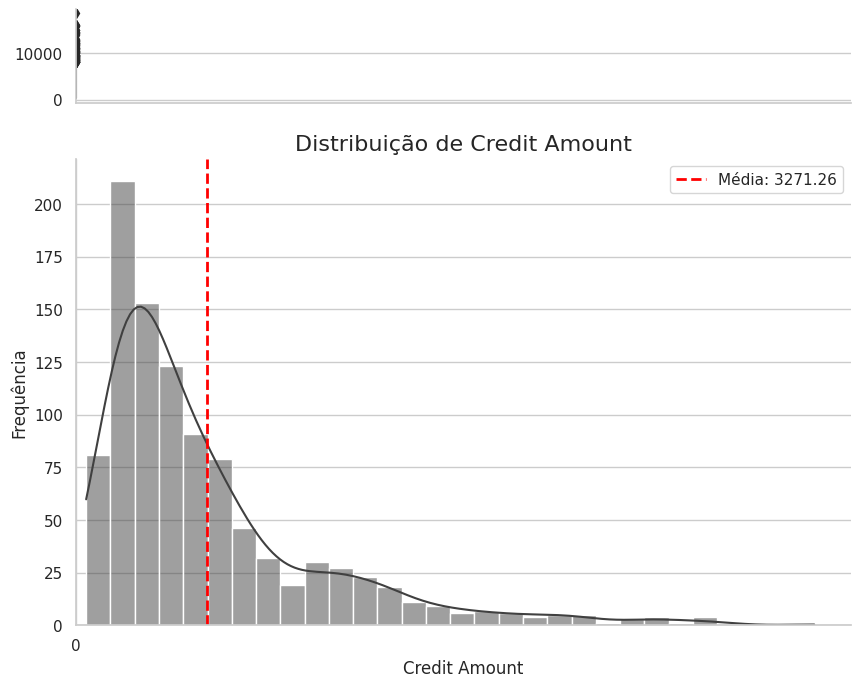

In [ ]:


# Configuração de estilo do Seaborn
sns.set(style="whitegrid")

# Criando uma figura com subplots
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)}, figsize=(10, 8))

# Adicionando um boxplot com cor grafite escura
sns.boxplot(credito['credit_amount'], ax=ax_box, color='#404040')
ax_box.set(xlabel='')

# Adicionando um histograma com cor grafite escura
sns.histplot(credito['credit_amount'], bins=30, kde=True, color='#404040', ax=ax_hist)
ax_hist.set(xlabel='Credit Amount', ylabel='Frequência')

# Adicionando uma linha para a média
mean = credito['credit_amount'].mean()
ax_hist.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Média: {mean:.2f}')
ax_hist.legend()

# Adicionando rótulos e título
plt.title('Distribuição de Credit Amount', fontsize=16)

# Ajustando a estética
sns.despine()

plt.show()


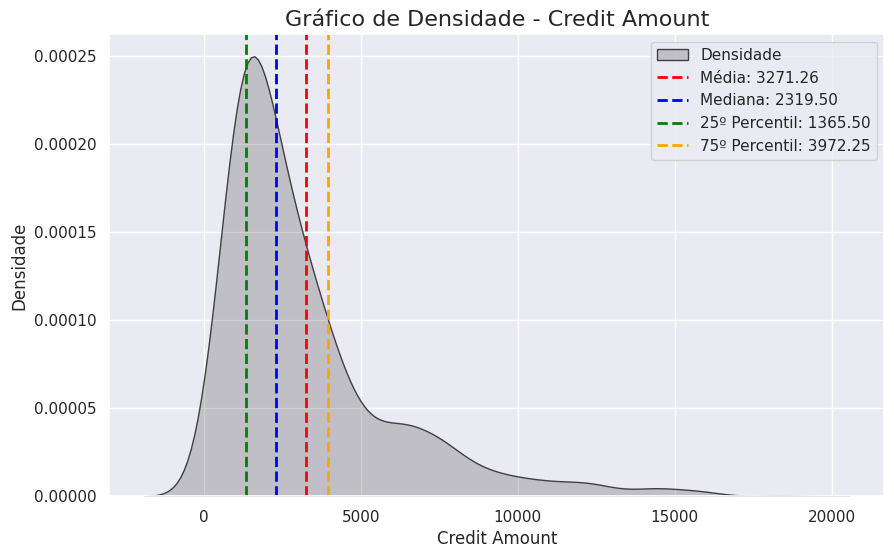

In [42]:


# Configuração de estilo do Seaborn
sns.set(style="darkgrid")

# Criando uma figura
plt.figure(figsize=(10, 6))

# Gráfico de densidade
sns.kdeplot(credito['credit_amount'], fill=True, color='#404040', label='Densidade')

# Adicionando linhas verticais para média, mediana e quartis
mean = credito['credit_amount'].mean()
median = credito['credit_amount'].median()
q25 = credito['credit_amount'].quantile(0.25)
q75 = credito['credit_amount'].quantile(0.75)

plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Média: {mean:.2f}')
plt.axvline(median, color='blue', linestyle='--', linewidth=2, label=f'Mediana: {median:.2f}')
plt.axvline(q25, color='green', linestyle='--', linewidth=2, label=f'25º Percentil: {q25:.2f}')
plt.axvline(q75, color='orange', linestyle='--', linewidth=2, label=f'75º Percentil: {q75:.2f}')

# Adicionando rótulos e título
plt.title('Gráfico de Densidade - Credit Amount', fontsize=16)
plt.xlabel('Credit Amount')
plt.ylabel('Densidade')

# Adicionando legenda
plt.legend()

# Mostrando o gráfico
plt.show()


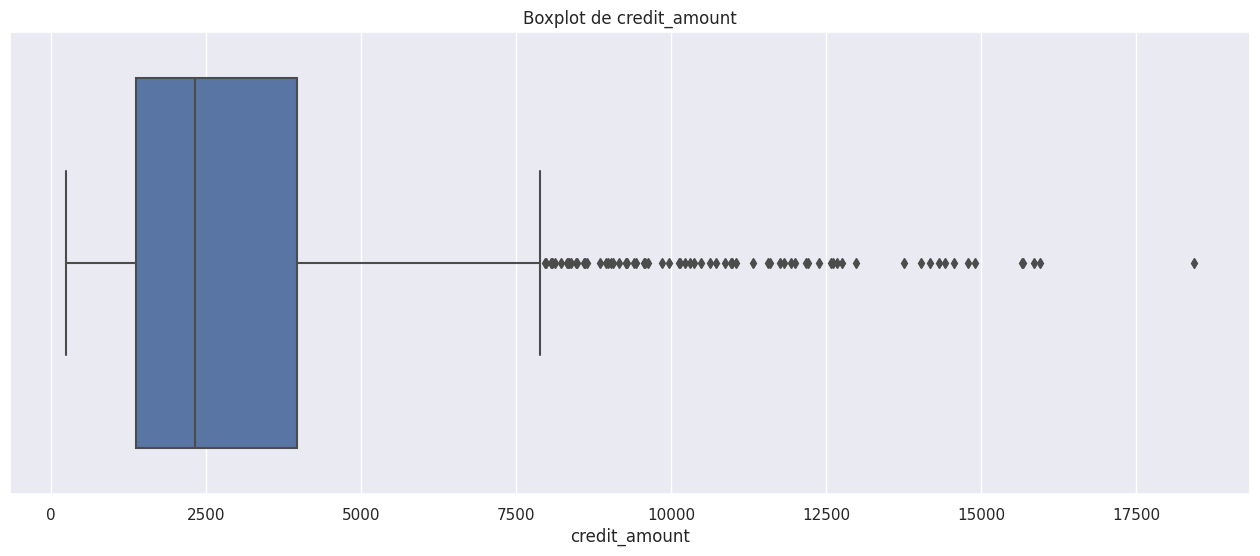

In [43]:
# Boxplot

ax = sns.boxplot(x=credito['credit_amount'], orient='h')
ax.set_title('Boxplot de credit_amount')
plt.show()

In [ ]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [ ]:
# Conversão dos atributos categóricos para atributos numéricos, passando o índice de cada atributo categórico
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder.fit_transform(previsores[:, 6])
previsores[:, 8] = labelencoder.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder.fit_transform(previsores[:, 9])
previsores[:, 11] = labelencoder.fit_transform(previsores[:, 11])
previsores[:, 13] = labelencoder.fit_transform(previsores[:, 13])
previsores[:, 14] = labelencoder.fit_transform(previsores[:, 14])
previsores[:, 16] = labelencoder.fit_transform(previsores[:, 16])
previsores[:, 18] = labelencoder.fit_transform(previsores[:, 18])
previsores[:, 19] = labelencoder.fit_transform(previsores[:, 19])

In [ ]:
# Divisão da base de dados entre treinamento e teste. Usamos 30% para testar e 70% para treinar. Random_state = 0 para sempre obter a mesma divisão da base quando o código for executado
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [ ]:
# Criação e treinamento do modelo
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [ ]:
# Exportação da árvore de decisão para o formato .dot, para posterior visualização
export_graphviz(arvore, out_file = 'tree.dot')

In [ ]:
# Obtenção das previsões
previsoes = arvore.predict(X_teste)
previsoes

array(['bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad'

In [ ]:
#matriz de confusão
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 43,  43],
       [ 51, 163]])

In [ ]:
#taxa acerto
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.6866666666666666

In [ ]:
#taxa erro
taxa_erro = 1 - taxa_acerto
taxa_erro

0.31333333333333335